In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dog = cv2.imread('/content/drive/MyDrive/Udemy Computer Vision Course/DATA/CATS_DOGS.zip (Unzipped Files)/CATS_DOGS/train/DOG/2.jpg')
dog=cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

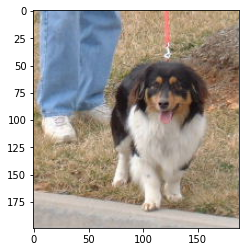

In [ ]:
plt.imshow(dog)

In [ ]:
# cat = cv2.imread()
# cat=cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

#image data generator to create more random images in different angles

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=30, 
                               # rotate the image 30 degrees
                               width_shift_range=0.1, 
                               # Shift the pic width by a max of 10%
                               height_shift_range=0.1, 
                               # Shift the pic height by a max of 10%
                               rescale=1/255, 
                               # Rescale the image by normalzing it.
                               shear_range=0.2, 
                               # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, 
                               # Zoom in by 20% max
                               horizontal_flip=True, 
                               # Allo horizontal flipping
                               fill_mode='nearest' 
                               # Fill in missing pixels with the nearest filled value
                              )

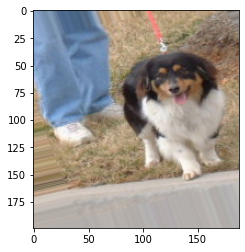

In [ ]:
plt.imshow(image_gen.random_transform(dog))

In [ ]:
image_gen.flow_from_directory('/content/drive/MyDrive/Udemy Computer Vision Course/DATA/CATS_DOGS.zip (Unzipped Files)/CATS_DOGS/train')

Found 18856 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [ ]:
model = Sequential()


model.add(Conv2D(32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense((128)))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense((1)))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
batch_size = 16
input_size=(150,150,3)

train_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/Udemy Computer Vision Course/DATA/CATS_DOGS.zip (Unzipped Files)/CATS_DOGS/train', target_size=input_size[:2],batch_size=batch_size,class_mode='binary')

test_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/Udemy Computer Vision Course/DATA/CATS_DOGS.zip (Unzipped Files)/CATS_DOGS/test', target_size=input_size[:2],batch_size=batch_size,class_mode='binary')

Found 18856 images belonging to 2 classes.
Found 6383 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [ ]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,validation_data=test_image_gen,validation_steps=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


150/150 [==============================] - 764s 5s/step - loss: 0.6869 - accuracy: 0.5412 - val_loss: 0.6286 - val_accuracy: 0.6406


#accuracy plot

In [ ]:
results.history['accuracy']

[0.5412499904632568]

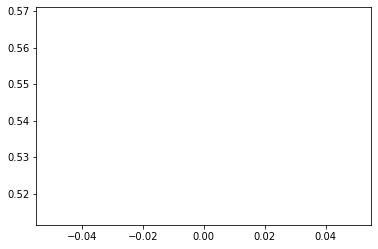

In [ ]:
plt.plot(results.history['accuracy'])

#loading trained model

In [ ]:
from keras.models import load_model

In [ ]:
new_model = load_model('cat_dog_100epochs.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dog_path = 'CATS_DOGS/test/DOG/10005.jpg'

In [ ]:
from keras.preprocessing import image

In [ ]:
dog_img = image.load_img(dog_path,target_size=(150,150,3))
#convert image to array
dog_img = image.img_to_array(dog_img)

In [ ]:
dog_img.shape

#add another dimension to make it seem as a single image

In [ ]:
dog_img = np.expand_dims(dog_img,axis=0)

In [ ]:
dog_img.shape

In [ ]:
dog_img=dog_img/255

In [ ]:
model.predict(dog_img)